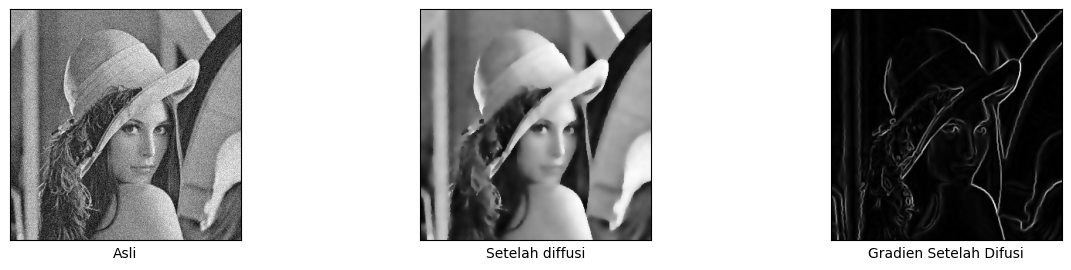

In [24]:
""" 
    Perona Malik Diffusion
    for Edge Detection
"""
"""
    Kode Utama dapat didapatkan dari link: https://github.com/fubel/PeronaMalikDiffusion.git
    This Code are little modification from link: https://github.com/fubel/PeronaMalikDiffusion.git
"""

import numpy as np
from scipy import misc, ndimage
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Pengaturan:
image_file = 'lena_noisy.jpg'
# iterations = 30
# delta = 0.14
# kappa = 15
iterations = 60
delta = 0.05
kappa = 15

# Konversi input image ke astype numpy
im = imageio.imread(image_file, as_gray=True)
im = im.astype('float64')

# inisial kondisi
u = im

# jarak piksel
dx = 0.5
dy = 0.5
dd = np.sqrt(2)

# 2D finite difference windows
windows = [
    np.array(
            [[0, 1, 0], [0, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [0, 1, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 1], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [1, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 1], [0, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [0, 0, 1]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [1, 0, 0]], np.float64
    ),
    np.array(
            [[1, 0, 0], [0, -1, 0], [0, 0, 0]], np.float64
    ),
]

for r in range(iterations):
    # approximate gradients
    nabla = [ ndimage.convolve(u, w) for w in windows ]

    # approximate diffusion function
    diff = [ 1./(1 + (n/kappa)**2) for n in nabla]

    # update image
    terms = [diff[i]*nabla[i] for i in range(4)]
    terms += [(1/(dd**2))*diff[i]*nabla[i] for i in range(4, 8)]
    u = u + delta*(sum(terms))


# Kernel for Gradient in x-direction
Kx = np.array(
    # [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.int32
    [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.int32
)
# Kernel for Gradient in y-direction
Ky = np.array(
    # [[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.int32
    [[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.int32
)
# Apply kernels to the image
Ix = ndimage.convolve(u, Kx)
Iy = ndimage.convolve(u, Ky)

# return norm of (Ix, Iy)
G = np.hypot(Ix, Iy)

plt.figure(figsize=(15,3))
plt.subplot(1, 3, 2), plt.imshow(u, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('Setelah diffusi')
plt.subplot(1, 3, 3), plt.imshow(G, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('Gradien Setelah Difusi')
plt.subplot(1, 3, 1), plt.imshow(im, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('Asli')
plt.grid
plt.show()